In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm

In [6]:
trans = pd.read_csv("../data/transaction/transaction_appended2.csv")
trans.head()
trans = trans.loc[trans.price >= 0,["계약년월","구","동","floor","brand","build_area","price","years_use","load_name"]]

In [7]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606002 entries, 0 to 616622
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   계약년월        606002 non-null  int64  
 1   구           606002 non-null  object 
 2   동           603261 non-null  object 
 3   floor       606002 non-null  int64  
 4   brand       606002 non-null  object 
 5   build_area  606002 non-null  float64
 6   price       606002 non-null  int64  
 7   years_use   606002 non-null  int64  
 8   load_name   606002 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 46.2+ MB


In [8]:
trans.head()

,계약년월,구,동,floor,brand,build_area,price,years_use,load_name
0,201801,강남구,개포동,4,개포6차우성아파트1동~8동,79.97,1300000000,35,언주로 3
1,201801,강남구,개포동,2,개포6차우성아파트1동~8동,79.97,1170000000,35,언주로 3
2,201801,강남구,개포동,1,개포6차우성아파트1동~8동,79.97,1300000000,35,언주로 3
3,201801,강남구,개포동,12,개포우성3차,161.00,2100000000,38,개포로 307
4,201801,강남구,개포동,16,개포자이(12-2),170.32,1620000000,18,개포로109길 69


In [15]:
a = "1+{}".format("강")
print(a)

1+강


In [16]:
cols = ["구","동","brand","load_name"]

for c in cols:
    encoder = LabelEncoder()
    encoder.fit(trans[c])
    labels = encoder.transform(trans[c])
    trans["{}_int".format(c)] = labels

trans.head()

,계약년월,구,동,floor,brand,build_area,price,years_use,load_name,구_int,동_int,brand_int,load_name_int
0,201801,강남구,개포동,4,개포6차우성아파트1동~8동,79.97,1300000000,35,언주로 3,0,8,601,5859
1,201801,강남구,개포동,2,개포6차우성아파트1동~8동,79.97,1170000000,35,언주로 3,0,8,601,5859
2,201801,강남구,개포동,1,개포6차우성아파트1동~8동,79.97,1300000000,35,언주로 3,0,8,601,5859
3,201801,강남구,개포동,12,개포우성3차,161.00,2100000000,38,개포로 307,0,8,605,449
4,201801,강남구,개포동,16,개포자이(12-2),170.32,1620000000,18,개포로109길 69,0,8,606,457


In [21]:
df = trans[["계약년월","구_int","동_int","floor","brand_int","build_area","years_use","load_name_int","price"]]

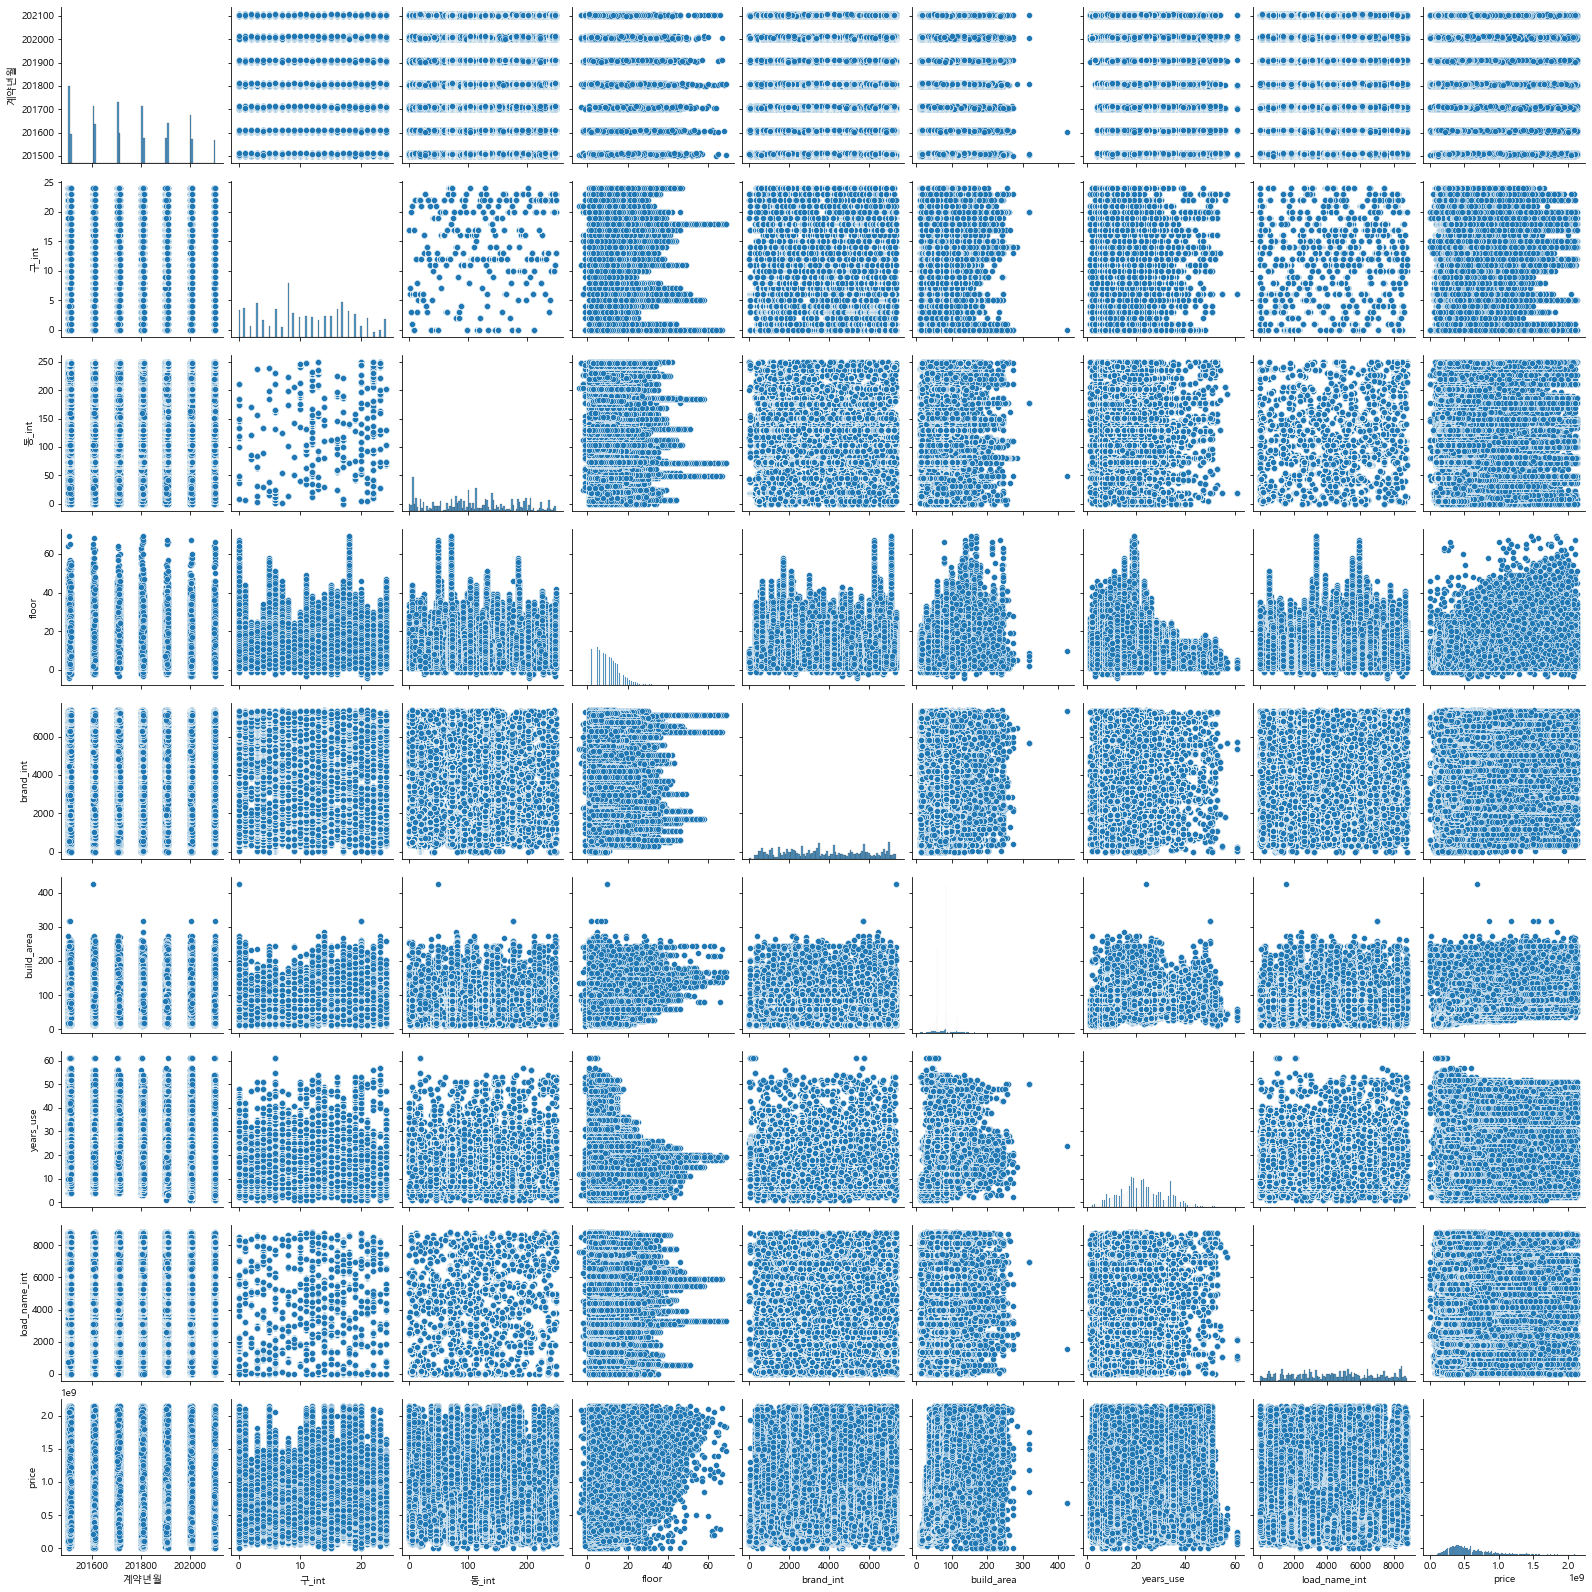

In [24]:
sns.pairplot(df)

In [17]:
X = trans[["계약년월","구_int","동_int","floor","brand_int","build_area","years_use","load_name_int"]]
y = trans["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(454501, 8) (454501,)
(151501, 8) (151501,)


In [ ]:
plt.

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 :  0.40762189448323916
테스트 점수 :  0.4051058019680269
기울기 : [ 7.00429910e+05 -1.91746922e+05 -9.29130010e+04  5.90683249e+06
 -5.43017108e+03  6.96419518e+06  5.81607077e+05  5.03446927e+03], 절편 : -141290778060.3661


In [13]:
##### 통계적 접근

from scipy import stats

result = stats.linregress(X_train.reshape(-1), y_train.reshape(-1))
result

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.042149264068325865)